,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


[0. 0. 0. 0. 0. 0.]


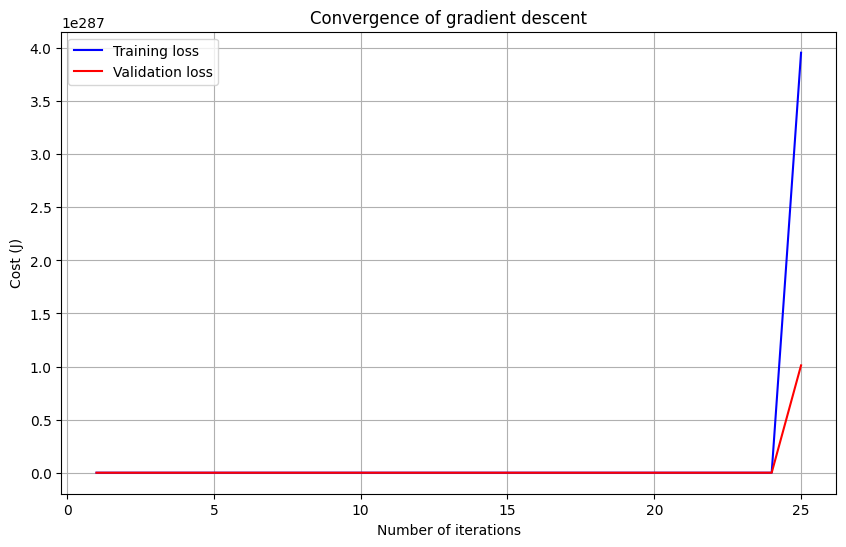

In [79]:
#Problem 1 a)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,10]]  # get input values from area, bedrooms, bathrooms, stories, parking columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,10]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,10]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 5)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 5)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 5)
X = np.hstack((X_0, X_1))

theta = np.zeros(6)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0.]
iterations = 25
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


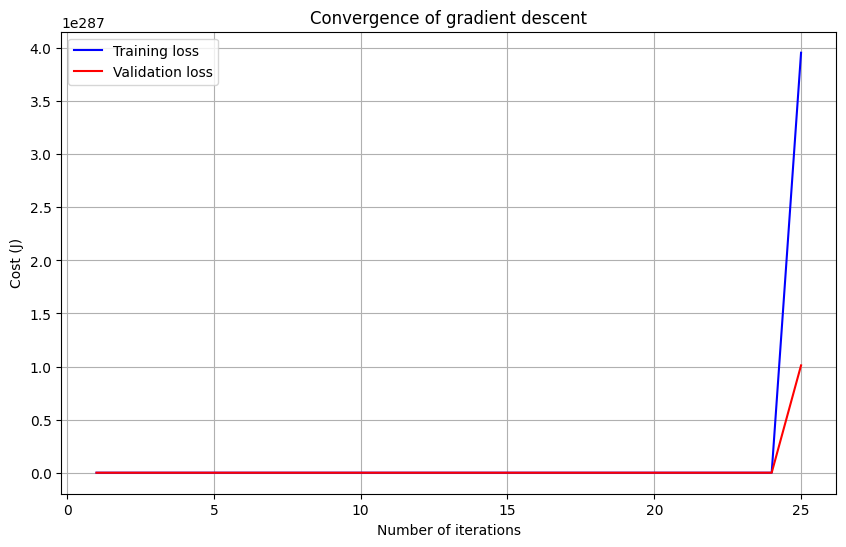

In [80]:
#Problem 1 b)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,5,6,7,8,9,10,11]]  # get input values from Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 11)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 11)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 11)
X = np.hstack((X_0, X_1))

theta = np.zeros(12)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 25
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


[0. 0. 0. 0. 0. 0.]


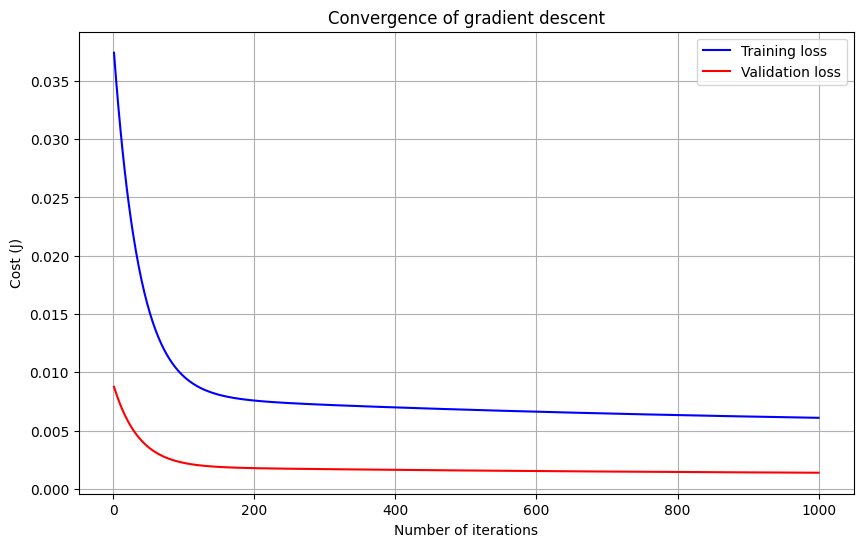

In [84]:
#Problem 2 a) Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,10]]  # get input values from area, bedrooms, bathrooms, stories, parking columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])  #transform on the entire dataset

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,10]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,10]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 5)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 5)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 5)
X = np.hstack((X_0, X_1))

theta = np.zeros(6)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1000
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


[0. 0. 0. 0. 0. 0.]


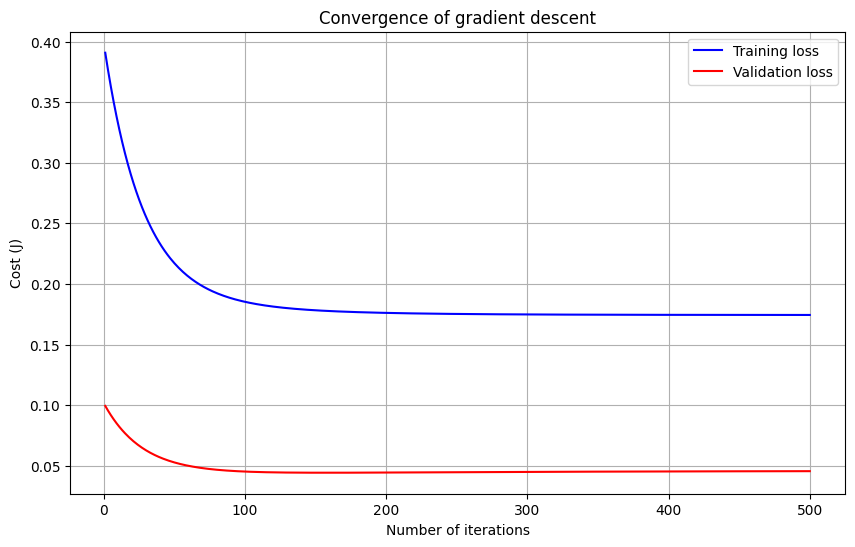

In [88]:
#Problem 2 a) Standardization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,10]]  # get input values from area, bedrooms, bathrooms, stories, parking columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])  #transform on the entire dataset

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,10]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,10]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 5)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 5)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 5)
X = np.hstack((X_0, X_1))

theta = np.zeros(6)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0.]
iterations = 500
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


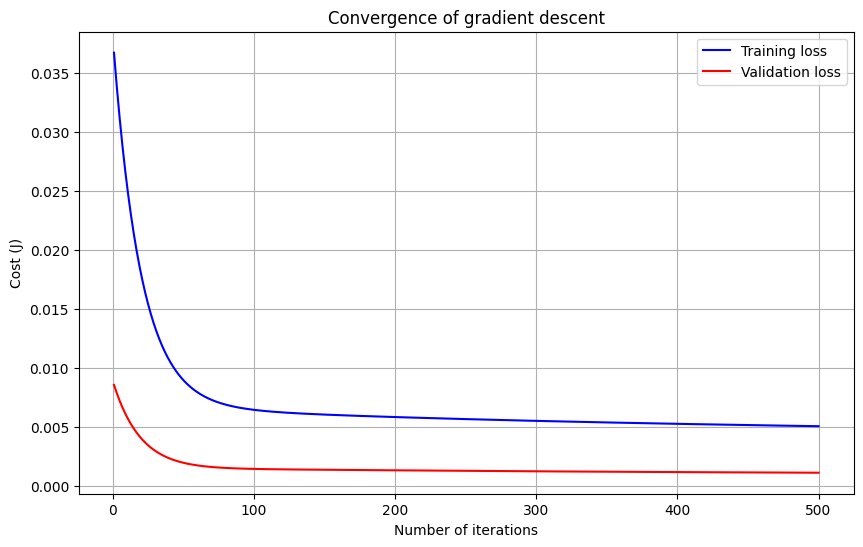

In [90]:
#Problem 2 b) Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,5,6,7,8,9,10,11]]  # get input values from Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])  #transform on the entire dataset

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 11)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 11)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 11)
X = np.hstack((X_0, X_1))

theta = np.zeros(12)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


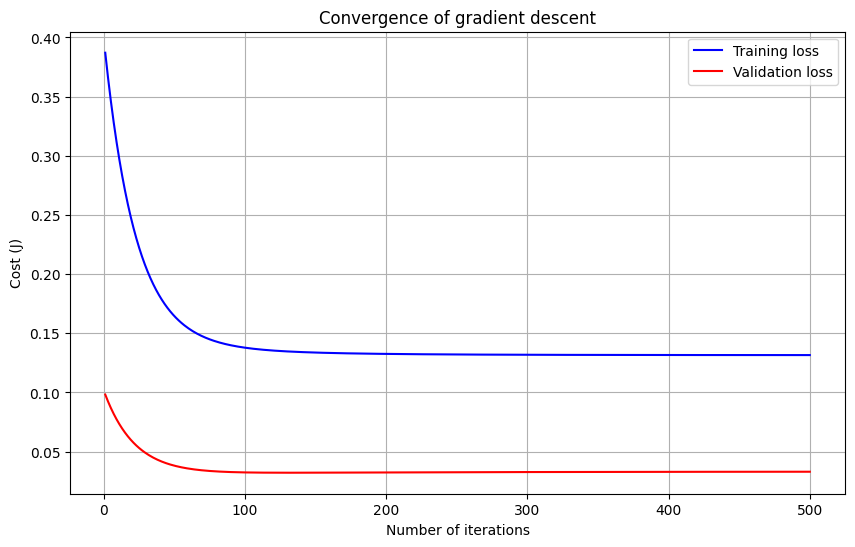

In [92]:
#Problem 2 b) Standardization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,5,6,7,8,9,10,11]]  # get input values from Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 11)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 11)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 11)
X = np.hstack((X_0, X_1))

theta = np.zeros(12)
theta
print (theta)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

cost = compute_cost(X, y, theta) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 500
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * X_train.transpose().dot(errors_train) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


[0. 0. 0. 0. 0. 0.]


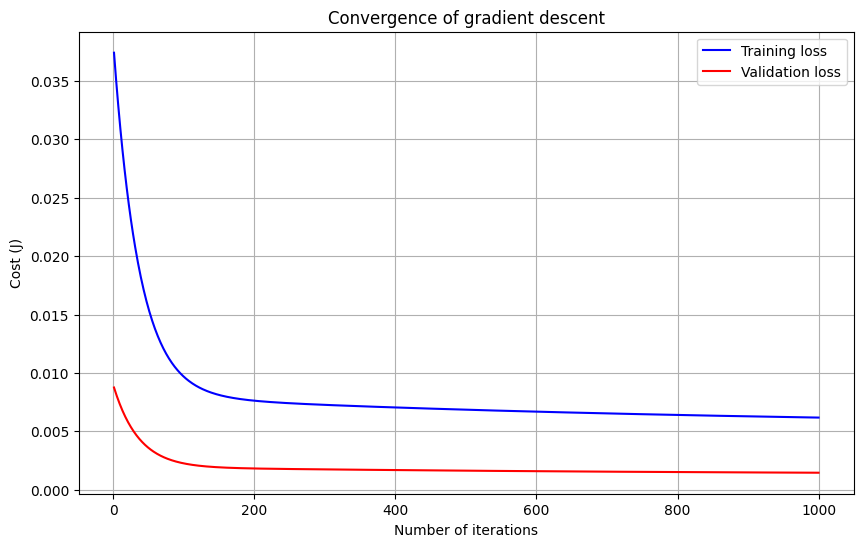

In [95]:
#Problem 3 a) Parameters penalty & Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,10]]  # get input values from area, bedrooms, bathrooms, stories, parking columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])  #transform on the entire dataset

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,10]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,10]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 5)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 5)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 5)
X = np.hstack((X_0, X_1))

theta = np.zeros(6)
theta
print (theta)


def compute_cost(X, y, theta, lambda_):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    penalty = lambda_ * np.sum(np.square(theta))
    J = 1 / (2 * m) * (np.sum(sqrErrors) + penalty)
    return J

lambda_ = 1
cost = compute_cost(X, y, theta, lambda_) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1000
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lambda_):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * (X_train.transpose().dot(errors_train) + lambda_ * theta) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta, lambda_)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta, lambda_)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lambda_)


#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


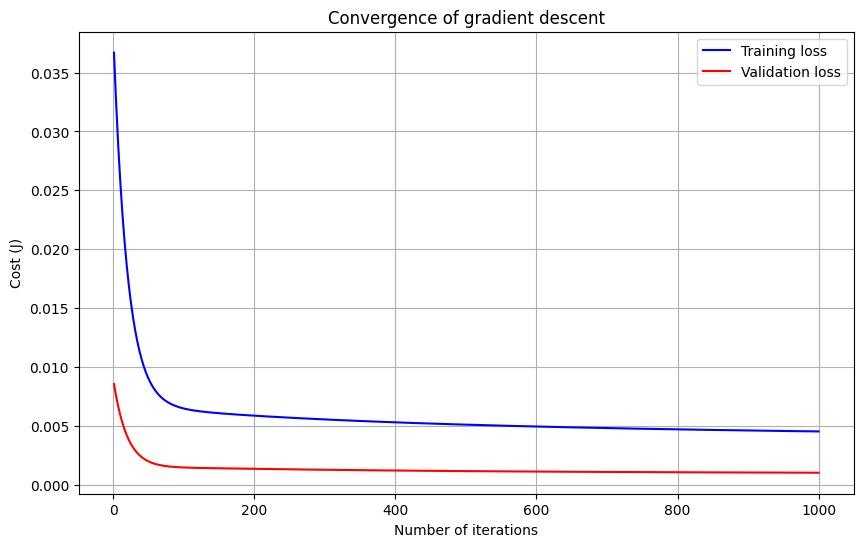

In [96]:
#Problem 3 b) Parameters penalty & Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

housing = pd.DataFrame(pd.read_csv(url))
data = housing.head()

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

from IPython.display import display
display(housing)

X = housing.values[:, [1,2,3,4,5,6,7,8,9,10,11]]  # get input values from Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea columns
y = housing.values[:, 0]   # get output values from first column

m = len(y)  # Number of training examples
n = len(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])  #transform on the entire dataset

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Extract features and output from training and testing sets
X_train = df_train.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_train = df_train.values[:, 0]

X_test = df_test.values[:, [1,2,3,4,5,6,7,8,9,10,11]]
y_test = df_test.values[:, 0]

# Get the number of training and testing examples
m_train = len(y_train)
m_test = len(y_test)

# Add a column of ones to X for training set
X_0_train = np.ones((m_train, 1))
X_1_train = X_train.reshape(m_train, 11)
X_train = np.hstack((X_0_train, X_1_train))

# Add a column of ones to X for testing set
X_0_test = np.ones((m_test, 1))
X_1_test = X_test.reshape(m_test, 11)
X_test = np.hstack((X_0_test, X_1_test))

# Set up for compute cost
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 11)
X = np.hstack((X_0, X_1))

theta = np.zeros(12)
theta
print (theta)

def compute_cost(X, y, theta, lambda_):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    penalty = lambda_ * np.sum(np.square(theta))
    J = 1 / (2 * m) * (np.sum(sqrErrors) + penalty)
    return J

lambda_ = 1
cost = compute_cost(X, y, theta, lambda_) # Calculate the initial cost

# Parameters
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1000
alpha = 0.01

# Gradient Descent function
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lambda_):
    m_train = len(y_train) #training and testing examples
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations) #Store training and testing cost history
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta) #Calculate predictions
        errors_train = np.subtract(predictions_train, y_train) #Calculate error
        sum_delta_train = (alpha / m_train) * (X_train.transpose().dot(errors_train) + lambda_ * theta) #gradiant
        theta -= sum_delta_train

        cost_history_train[i] = compute_cost(X_train, y_train, theta, lambda_)

        predictions_test = X_test.dot(theta) #calculate predictions for test set
        errors_test = np.subtract(predictions_test, y_test)
        cost_history_test[i] = compute_cost(X_test, y_test, theta, lambda_)

    return theta, cost_history_train, cost_history_test

theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lambda_)

#plot training and vlaidation loss
plt.plot(range(1, iterations + 1), cost_history_train, color='blue', label='Training loss')
plt.plot(range(1, iterations + 1), cost_history_test, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()